<a href="https://colab.research.google.com/github/hhhjin/data-analysis/blob/main/201910864_%EC%9D%B4%ED%98%95%EC%A7%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 201910864 이형진 데이터분석 프로젝트

![image](https://storage.googleapis.com/kaggle-datasets-images/2479030/4204866/1abb0a11afb13ba583886d37d1fd0941/dataset-cover.png?t=2022-09-14-18-55-00)

# A/B 테스팅

절반의 유저는 기존의 화면을 보게 하고 나머지 절반은 새로 기획한 화면을 보게 해서 유의미한 수익률 상승이 있는지를 확인하고 싶다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('AB_Test_Results.csv')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


데이터는 `USER_ID`, `VARIANT_NAME`, `REVENUE` 3개의 열로 구성되어 있다. `VARIANT_NAME`의 `control`은 기존 화면이고 `variant`는 새로 실험중인 화면이라 할 수 있다.

## 데이터 확인

In [7]:
print(" SHAPE ".center(70,'-'))
print('Rows: {}'.format(df.shape[0]))
print('Columns: {}'.format(df.shape[1]))
print(" TYPES ".center(70,'-'))
print(df.dtypes)
print(" HEAD ".center(70,'-'))
print(df.head(5))
print(" TAIL ".center(70,'-'))
print(df.tail(5))
print(" MISSING VALUES ".center(70,'-'))
print(df.isnull().sum())
print(" DUPLICATED VALUES ".center(70,'-'))
print(df.duplicated().sum())
print(" DESCRIBE ".center(70,'-'))
print(df.describe([0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]).T)

------------------------------- SHAPE --------------------------------
Rows: 10000
Columns: 3
------------------------------- TYPES --------------------------------
USER_ID           int64
VARIANT_NAME     object
REVENUE         float64
dtype: object
-------------------------------- HEAD --------------------------------
   USER_ID VARIANT_NAME  REVENUE
0      737      variant      0.0
1     2423      control      0.0
2     9411      control      0.0
3     7311      control      0.0
4     6174      variant      0.0
-------------------------------- TAIL --------------------------------
      USER_ID VARIANT_NAME  REVENUE
9995     1981      control      0.0
9996      502      variant      0.0
9997     9214      variant      0.0
9998     7741      control      0.0
9999     9468      control      0.0
--------------------------- MISSING VALUES ---------------------------
USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64
------------------------- DUPLICATED VALUES -----------

In [30]:
# USER_ID 유니크한 행 갯수
df['USER_ID'].nunique()

6324

In [31]:
# USER_ID로 그룹화를 하고 USER_ID별 VARIANT_NAME이 1개인지 확인
duplicates = (df.groupby("USER_ID")["VARIANT_NAME"].nunique() == 1)
duplicates = duplicates[duplicates]

# USER_ID 열의 값이 duplicates 변수에 있는 값인 행만 df 데이터프레임에서 선택
df = df[df["USER_ID"].isin(duplicates.index)]

In [32]:
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["REVENUE"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
REVENUE,6070.0,0.107064,2.673501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.16,196.01


In [33]:
df.sort_values(by='REVENUE', ascending=False).head(10)

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01
8168,2166,control,29.32
2482,7356,variant,23.04
6412,1053,control,20.07
5217,3684,variant,19.47
5530,282,control,18.56
758,4445,control,17.05
4031,2059,control,14.24
9019,1973,control,14.07
4561,4966,variant,12.99


In [34]:
df.groupby(by='VARIANT_NAME').agg({'USER_ID': 'nunique',
                                               'REVENUE': ['sum', 'mean', 'median', 'count']})

USER_ID REVENUE                       
             nunique     sum      mean median count
VARIANT_NAME                                       
control         2390  470.56  0.155506    0.0  3026
variant         2393  179.32  0.058909    0.0  3044

In [35]:
df.groupby("USER_ID")['REVENUE'].agg(["count", "median", "mean", "std", "max", 'sum']).sort_values(by='sum', ascending=False)

,count,median,mean,std,max,sum
USER_ID,,,,,,
3342,1,196.01,196.0100,NaN,196.01,196.01
2166,2,14.66,14.6600,20.732371,29.32,29.32
7356,1,23.04,23.0400,NaN,23.04,23.04
1053,4,0.00,5.0175,10.035000,20.07,20.07
3684,1,19.47,19.4700,NaN,19.47,19.47
...,...,...,...,...,...,...
3363,1,0.00,0.0000,NaN,0.00,0.00
3362,1,0.00,0.0000,NaN,0.00,0.00
3361,1,0.00,0.0000,NaN,0.00,0.00


<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

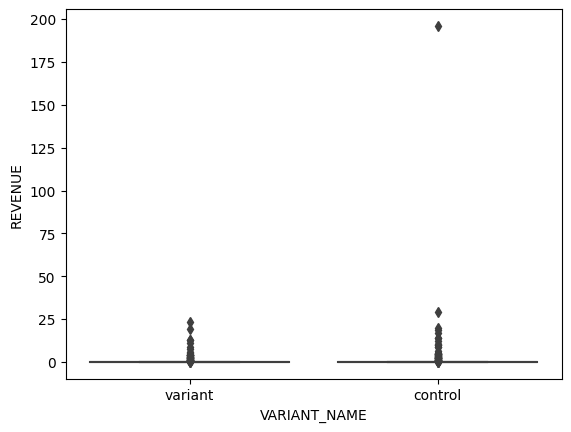

In [36]:
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=df)

이상치 데이터 발견해서 지우고자 한다.

In [37]:
df[df['USER_ID'] == 3342]

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01


In [38]:
df = df[df['USER_ID'] != 3342]

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

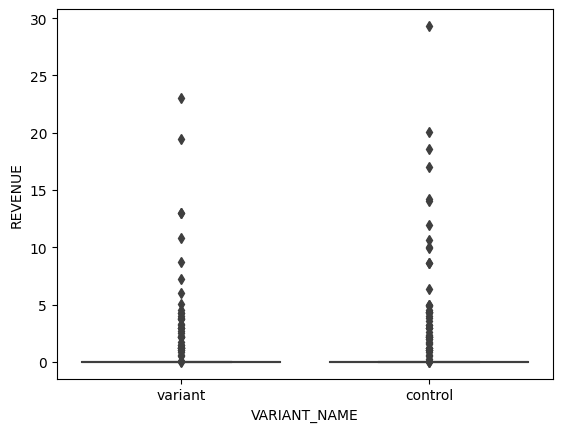

In [39]:
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=df)

수업시간 때 배운 독립표본 T분석을 이용해 유의미한 변화가 있는지 확인하려고 한다.

귀무 가설: 유의미한 수익 변화가 없을 것이다.

대립 가설: 유의미한 수익 변화가 있을 것이다.

In [40]:
from scipy.stats import ttest_ind

# control 표본 수익
control_revenue = df[df["VARIANT_NAME"] == "control"]["REVENUE"]

# variant 표본 수익
variant_revenue = df[df["VARIANT_NAME"] == "variant"]["REVENUE"]

# 평균을 비교할 두 표본을 ttest_ind의 파라미터로 전달하여 p값을 계산합니다.
_, p_value = ttest_ind(control_revenue, variant_revenue)

# 유의수준을 0.05로 선택합니다.
a = 0.05

# p값이 유의수준보다 작은 경우 귀무가설을 기각합니다.
if p_value < a:
  print(f"P-value [{p_value}] < Significant level [{a}]; H1 is accepted.")
else:
  print(f"P-value [{p_value}] >= Significant level [{a}]; H0 is accepted.")


print(control_revenue.mean())
print(variant_revenue.mean())

P-value [0.17149090193658398] >= Significant level [0.05]; H0 is accepted.
0.0907603305785124
0.05890932982917214


p 값이 유의수준보다 크게 나와 귀무가설이 채택됐다.

결론: 유의미한 수익 변화는 없다.